In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import beta, binom
import itertools
from ipywidgets import interact, interactive

import hashlib
%matplotlib inline

sns.set(style="dark")
plt.style.use("ggplot")

import pymc3 as pm
import arviz as az

In [2]:
happy = pd.read_csv('World Happiness Report.csv')
life = pd.read_csv('Life Expectancy Data.csv')

In [3]:
happy = happy.rename(columns={"Country Name": "Country"})

In [4]:
merged = life.merge(happy, how = 'inner', on = ['Country', 'Year'])

In [5]:
columns = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life Ladder', 'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']

In [6]:
merged = merged.dropna()

In [7]:
Status_Indicator = merged.Status.map(dict(Developing=0, Developed=1))

In [8]:
merged['Status Indicator'] = Status_Indicator

In [9]:
merged.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Status Indicator
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0


In [10]:
grouped = merged.groupby(['Country']).mean()
grouped.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Status Indicator
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2011.500000,59.875000,274.500000,70.375000,0.012500,58.202410,64.875000,1790.625000,17.400000,95.750000,...,7.589941,0.515188,51.550000,0.562421,0.141376,0.815038,0.504555,0.286646,0.427282,0.0
Albania,2012.200000,77.060000,52.200000,0.200000,4.918000,333.858237,98.600000,6.200000,55.840000,0.800000,...,9.305332,0.726059,68.216002,0.640089,-0.083702,0.870555,0.547012,0.308215,0.401887,0.0
Argentina,2010.000000,75.588889,98.888889,9.444444,8.163333,1061.475672,81.777778,2.888889,53.811111,10.666667,...,10.044856,0.906328,66.300001,0.719619,-0.147993,0.842842,0.754868,0.263281,0.411542,0.0
Armenia,2010.000000,73.744444,104.444444,1.000000,3.981111,203.076666,90.777778,18.111111,41.422222,1.000000,...,9.177718,0.703882,64.800000,0.496155,-0.217615,0.878101,0.466998,0.431185,0.335829,0.0
Australia,2010.714286,82.000000,55.285714,1.000000,10.250000,9071.594024,92.142857,147.571429,64.328571,1.142857,...,10.728655,0.947152,70.257142,0.924931,0.310600,0.419014,0.745028,0.212288,0.521874,1.0


In [12]:
grouped.std()

Year                                 1.176668e+00
Life expectancy                      9.155985e+00
Adult Mortality                      9.224613e+01
infant deaths                        1.315337e+02
Alcohol                              3.904405e+00
percentage expenditure               1.722046e+03
Hepatitis B                          1.924459e+01
Measles                              4.617994e+03
 BMI                                 1.669563e+01
under-five deaths                    1.790623e+02
Polio                                1.523522e+01
Total expenditure                    1.938494e+00
Diphtheria                           1.496279e+01
 HIV/AIDS                            3.099783e+00
GDP                                  1.144727e+04
Population                           4.380305e+07
 thinness  1-19 years                4.509466e+00
 thinness 5-9 years                  4.488269e+00
Income composition of resources      1.651323e-01
Schooling                            2.936952e+00


OH NOTES
- sounds more like Bayesian GLM rather than Hierarchical
- could use GLMs as a tool
- Bayesian GLM Non-Parametric and Some Parametric Methods
- Predicting Happiness?
- Doesn't make sense to use Bern bc theta is a random variable between 0 and 1
- you're predicting based on the parameters, predicting the probability that a country is developed, but if you make it bern
- Stop here and write up the report
- Not sure if we can do multipple observed

In [14]:
def betaParams(mean, std):
    var = std ** 2
    
    alpha = ((1 - mu)/var - (1 / mu)) * (mu ** 2)
    beta = alpha * (1 / mu - 1)
    
    return alpha

In [13]:
pi = sum(grouped['Status Indicator']) / len(grouped)
sigma = 0.4    # this is a placeholder
mu_gdp = 9.075154
sigma_gdp = 1.165183
mu_a_mort = 1.583724e+02
mu_expectancy = 7.009000e+01

In [27]:
with pm.Model() as develop_prediction:
    
    # is country i developed or not?
    y = pm.Bernoulli('y', p = pi)
    
    # mean gdp per group
    mu = pm.Normal('mu', mu = mu_gdp, sigma = sigma_gdp, shape = 2)
#     lamda = pm.Poisson('lamda', mu = mu_a_mort, shape = 2)
#     lamda_2 = pm.Poisson('lamda_2', mu = mu_expectancy, shape = 2)
    
    gdp_mean = mu[y]
    
    mort_mean = lamda[y]
    expectancy = lamda_2[y]
    #+ mort_mean * 0.3 + expectancy * 0.3
    # putting the model together
    x = pm.Normal('x', mu =gdp_mean, sigma = sigma, observed=merged['Log GDP Per Capita'])
    
    trace = pm.sample(2000, chains = 4, tune = 1000, return_inferencedata = True)
    ppc = pm.sample_posterior_predictive(trace, samples=500, model=develop_prediction, size=100)    # posterior predictive check

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [y]
>NUTS: [mu]


/Users/cassandracalciano/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cassandracalciano/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cassandracalciano/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cassandracalciano/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.
There were 118 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increas

In [40]:
trace.posterior

<xarray.Dataset>
Dimensions:   (chain: 4, draw: 2000, mu_dim_0: 2)
Coordinates:
  * chain     (chain) int64 0 1 2 3
  * draw      (draw) int64 0 1 2 3 4 5 6 ... 1993 1994 1995 1996 1997 1998 1999
  * mu_dim_0  (mu_dim_0) int64 0 1
Data variables:
    y         (chain, draw) int64 1 1 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0
    mu        (chain, draw, mu_dim_0) float64 8.268 9.149 9.364 ... 9.163 7.671
Attributes:
    created_at:                 2023-05-05T23:56:35.629981
    arviz_version:              0.12.1
    inference_library:          pymc3
    inference_library_version:  3.11.5
    sampling_time:              21.745543956756592
    tuning_steps:               1000

In [29]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y,0.242,0.429,0.000,1.000,0.202,0.154,4.0,4.0,3.15
mu[0],9.140,0.578,7.747,10.516,0.011,0.008,3579.0,30.0,1.43
mu[1],9.087,1.019,6.960,11.014,0.012,0.009,7097.0,3116.0,1.47


(array([6061.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1939.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

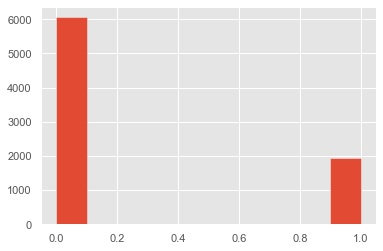

In [30]:
plt.hist(trace.posterior['y'].values.flatten())

In [31]:
import seaborn as sns

def plot_hist(sample, **options):
    """Plot a histogram of goals.
    
    sample: sequence of values
    """
    sns.histplot(sample, stat='probability', discrete=True,
                 alpha=0.5)

In [32]:
with develop_prediction:
    post_pred = pm.sample_posterior_predictive(trace)

In [37]:
sample_post_pred = post_pred['x']
sample_post_pred.mean()

9.142949788054276

(array([[0.        , 0.00149808, 0.02247118, ..., 0.07070933, 0.00389501,
         0.        ],
        [0.        , 0.        , 0.02037387, ..., 0.06951086, 0.00389501,
         0.        ],
        [0.        , 0.00179769, 0.02007426, ..., 0.07310625, 0.00389501,
         0.        ],
        ...,
        [0.00029962, 0.00149808, 0.02426888, ..., 0.07100894, 0.00808963,
         0.        ],
        [0.        , 0.00089885, 0.0188758 , ..., 0.07190779, 0.0056927 ,
         0.00029962],
        [0.        , 0.00179769, 0.02337003, ..., 0.07250702, 0.00449424,
         0.00029962]]),
 array([ 6.96138024,  7.37858121,  7.79578218,  8.21298315,  8.63018412,
         9.0473851 ,  9.46458607,  9.88178704, 10.29898801, 10.71618898,
        11.13338995]),
 <a list of 677 BarContainer objects>)

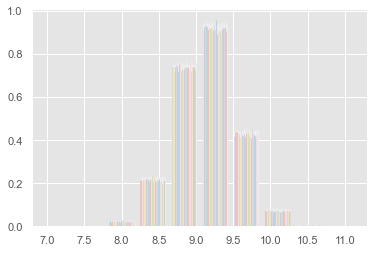

In [34]:
plt.hist(x=sample_post_pred, density=True)

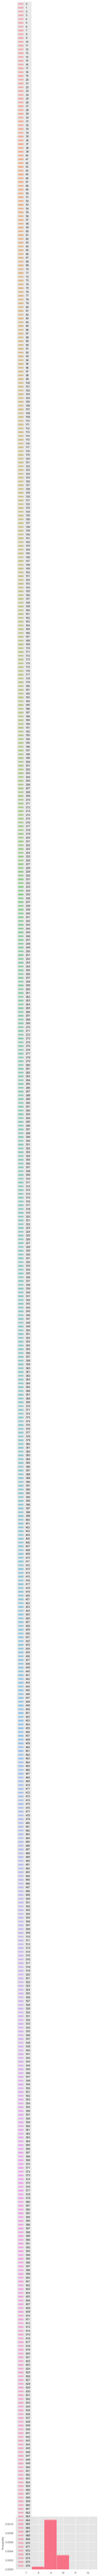

In [35]:
plot_hist(sample_post_pred, label='posterior pred')

In [36]:
plt.hist(trace.posterior['x'].values.flatten(), bins=20)

KeyError: 'x'